In [50]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [52]:
df = pd.read_csv('../data/EEG data.csv')

In [54]:
df = df.iloc[:,1:]

In [56]:
df.head()

,alpha1,alpha2,alpha3,alpha4,alpha5,alpha6,alpha7,alpha8,alpha9,alpha10,...,gamma56,gamma57,gamma58,gamma59,gamma60,gamma61,gamma62,gamma63,gamma64,target
0,284.849874,142.644639,121.959358,20.689941,162.718859,96.712580,32.107585,109.816990,82.554413,147.220176,...,728.620372,357.317390,418.459495,803.357489,622.743387,407.283894,1039.213087,814.602268,495.681338,1
1,233.226345,206.517299,176.217193,142.113615,236.910116,214.179673,122.244364,224.277579,206.748386,250.616929,...,47.706396,22.760991,61.017669,42.583440,32.913916,105.082693,127.043945,149.076038,143.302551,1
2,399.259569,422.363340,406.151660,99.736116,532.974104,399.405680,128.695200,440.958308,210.810962,383.109241,...,52.067200,33.067416,53.119327,40.865276,35.342310,294.777573,606.454735,231.034750,103.109478,1
3,838.752489,365.625881,318.992672,88.560230,544.835506,347.261656,121.668737,477.065877,379.691139,651.205159,...,35.284169,27.243271,48.598166,42.098596,34.789934,152.930283,651.219426,163.767926,110.319292,1
4,1282.646997,890.329519,783.534246,292.672272,1250.784307,986.049484,446.149832,1310.041361,1054.326805,1391.051639,...,192.121056,24.736841,217.990994,15.108556,15.609225,74.499232,160.088545,271.600819,107.385538,1


In [58]:
# 321 colms => 320 for 5 wave 64 channels one for the target

In [60]:
import matplotlib.pyplot as plt

In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [64]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1:]

In [66]:
pca.fit(X,Y)

PCA(n_components=2)

In [68]:
pca.explained_variance_ratio_

array([0.58439083, 0.2458798 ])

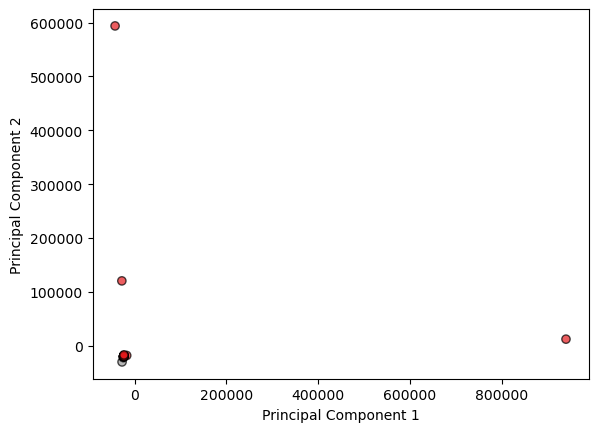

In [75]:
import matplotlib.pyplot as plt
import numpy as np

X_pca = pca.transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=np.array(Y), cmap=plt.cm.Set1, edgecolor='k', alpha=0.7)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.show()

# LogisticRegression

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [80]:
model1 = LogisticRegression(random_state=7,verbose=0,n_jobs=-1,max_iter=100000)

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [84]:
model1.fit(X_train,Y_train)

LogisticRegression(max_iter=100000, n_jobs=-1, random_state=7)

In [85]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
def evaluate_model(model, X_test, Y_test):
    Y_pred = model.predict(X_test)

    metrics = {
        "Accuracy": accuracy_score(Y_test, Y_pred),
        "Precision": precision_score(Y_test, Y_pred),
        "Recall": recall_score(Y_test, Y_pred),
        "F1 Score": f1_score(Y_test, Y_pred),
    }

    return metrics

### Training set

In [89]:
evaluate_model(model1,X_train,Y_train)

{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0}

### Validation set

In [92]:
evaluate_model(model1,X_test,Y_test)

{'Accuracy': 0.25, 'Precision': 0.25, 'Recall': 0.25, 'F1 Score': 0.25}

# SVM turn

In [95]:
from sklearn import svm

### Linear Kernel

In [98]:
model2 = svm.SVC(kernel='linear',random_state=42)

In [100]:
model2.fit(X_train,Y_train)
print("train : " , evaluate_model(model2,X_train,Y_train))
print("validation : ",evaluate_model(model2,X_test,Y_test))

train :  {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0}
validation :  {'Accuracy': 0.375, 'Precision': 0.3333333333333333, 'Recall': 0.25, 'F1 Score': 0.2857142857142857}


### Polynomial Kernel

In [103]:
model3 = svm.SVC(kernel='poly',random_state=42)

In [105]:
model3.fit(X_train,Y_train)
print("train : " , evaluate_model(model3,X_train,Y_train))
print("validation : ",evaluate_model(model3,X_test,Y_test))

train :  {'Accuracy': 0.5625, 'Precision': 0.5333333333333333, 'Recall': 1.0, 'F1 Score': 0.6956521739130435}
validation :  {'Accuracy': 0.5, 'Precision': 0.5, 'Recall': 1.0, 'F1 Score': 0.6666666666666666}


### RBF Kernel

In [108]:
model4 = svm.SVC(kernel='rbf',random_state=42)

In [110]:
model4.fit(X_train,Y_train)
print("train : " , evaluate_model(model4,X_train,Y_train))
print("validation : ",evaluate_model(model4,X_test,Y_test))

train :  {'Accuracy': 0.59375, 'Precision': 0.5517241379310345, 'Recall': 1.0, 'F1 Score': 0.7111111111111111}
validation :  {'Accuracy': 0.375, 'Precision': 0.42857142857142855, 'Recall': 0.75, 'F1 Score': 0.5454545454545454}


### Sigmoid Kernel 

In [120]:
model5 = svm.SVC(kernel='sigmoid',random_state=42)

In [122]:
model5.fit(X_train,Y_train)
print("train : " , evaluate_model(model5,X_train,Y_train))
print("validation : ",evaluate_model(model5,X_test,Y_test))

train :  {'Accuracy': 0.59375, 'Precision': 0.5517241379310345, 'Recall': 1.0, 'F1 Score': 0.7111111111111111}
validation :  {'Accuracy': 0.5, 'Precision': 0.5, 'Recall': 1.0, 'F1 Score': 0.6666666666666666}


# KNN turn

In [125]:
from sklearn.neighbors import KNeighborsClassifier

In [127]:
for i in range(1,10):
    model6 = KNeighborsClassifier(n_neighbors=i,algorithm='ball_tree')
    model6.fit(X_train,Y_train)
    print('-'*50)
    print('n_neighbours = ' , i )
    print("train : " , evaluate_model(model6,X_train,Y_train))
    print("validation : ",evaluate_model(model6,X_test,Y_test))
    

--------------------------------------------------
n_neighbours =  1
train :  {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0}
validation :  {'Accuracy': 0.25, 'Precision': 0.25, 'Recall': 0.25, 'F1 Score': 0.25}
--------------------------------------------------
n_neighbours =  2
train :  {'Accuracy': 0.6875, 'Precision': 1.0, 'Recall': 0.375, 'F1 Score': 0.5454545454545454}
validation :  {'Accuracy': 0.125, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}
--------------------------------------------------
n_neighbours =  3
train :  {'Accuracy': 0.8125, 'Precision': 0.7777777777777778, 'Recall': 0.875, 'F1 Score': 0.8235294117647058}
validation :  {'Accuracy': 0.125, 'Precision': 0.2, 'Recall': 0.25, 'F1 Score': 0.2222222222222222}
--------------------------------------------------
n_neighbours =  4
train :  {'Accuracy': 0.5625, 'Precision': 0.6, 'Recall': 0.375, 'F1 Score': 0.46153846153846156}
validation :  {'Accuracy': 0.0, 'Precision': 0.0, 'Recall': 0.0, 'F1 S

## Hence Complex, Non-Linear Patterns : EEG data contains non-linear relationships as evidenced by improved performance with non-linear kernels over linear but still something else like feature eng , feature selection or dimensionality reduction have to be done in order to math the complexity of the data